# 603 Final
# Superstore Regression Analysis


## Q: To find the most high-profit regions and seasons for understanding various aspects of the store's business, including customer behavior and sales trends.

## Importing Libraries and Data

In [ ]:
#Importing the default standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from tabulate import tabulate

In [ ]:
#Importing everything required for regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
url = 'https://raw.githubusercontent.com/Nithinsameer/DATA603-Project/main/Superstore.csv'
df = pd.read_csv(url)
df.shape

(9994, 21)

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Pre-Processing

In [ ]:
#Dropping the incosiquential features
df = df.drop(columns={'Order ID','Customer ID','Postal Code','Product ID','Product Name'})

In [ ]:
#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   Country        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Region         9994 non-null   object 
 10  Category       9994 non-null   object 
 11  Sub-Category   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.2+ MB


In [ ]:
df.dtypes

Row ID             int64
Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Category          object
Sub-Category      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
for row in df:
  df['order_year'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.year.astype(object)

In [ ]:
for row in df:
  df['order_month'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.month.astype(object)

In [ ]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_month
0,1,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,8
1,2,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,8
2,3,2016-12-06,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,12
3,4,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,11
4,5,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,11


In [ ]:
df = df.assign(Season = 0)
#df.head()

In [ ]:
df.loc[df['order_month'] == 3, 'Season'] = 'Spring'
#df

In [ ]:
df.loc[df['order_month'] == 3, 'Season'] = 'Spring'
df.loc[df['order_month'] == 4, 'Season'] = 'Spring'
df.loc[df['order_month'] == 5, 'Season'] = 'Spring'
df.loc[df['order_month'] == 6, 'Season'] = 'Summer'
df.loc[df['order_month'] == 7, 'Season'] = 'Summer'
df.loc[df['order_month'] == 8, 'Season'] = 'Summer'
df.loc[df['order_month'] == 9, 'Season'] = 'Fall'
df.loc[df['order_month'] == 10, 'Season'] = 'Fall'
df.loc[df['order_month'] == 11, 'Season'] = 'Fall'
df.loc[df['order_month'] == 12, 'Season'] = 'Winter'
df.loc[df['order_month'] == 1, 'Season'] = 'Winter'
df.loc[df['order_month'] == 2, 'Season'] = 'Winter'

In [ ]:
#df

In [ ]:
df.dropna()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_month,Season
0,1,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,8,Summer
1,2,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,8,Summer
2,3,2016-12-06,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,12,Winter
3,4,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,11,Fall
4,5,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,11,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,2014,1,Winter
9990,9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,2017,2,Winter
9991,9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,2017,2,Winter
9992,9993,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,2017,2,Winter


##Outlier detection and elimination

In [ ]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
outlier_datapoints = detect_outlier(df['Profit'])
#outlier_datapoints

In [ ]:
for value in outlier_datapoints:
  df.drop(df.loc[df['Profit']== value].index, inplace=True)

In [ ]:
df

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_month,Season
0,1,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,8,Summer
1,2,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,8,Summer
2,3,2016-12-06,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,12,Winter
3,4,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,11,Fall
4,5,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,11,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,2014,1,Winter
9990,9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,2017,2,Winter
9991,9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,2017,2,Winter
9992,9993,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,2017,2,Winter


## Data Visualization

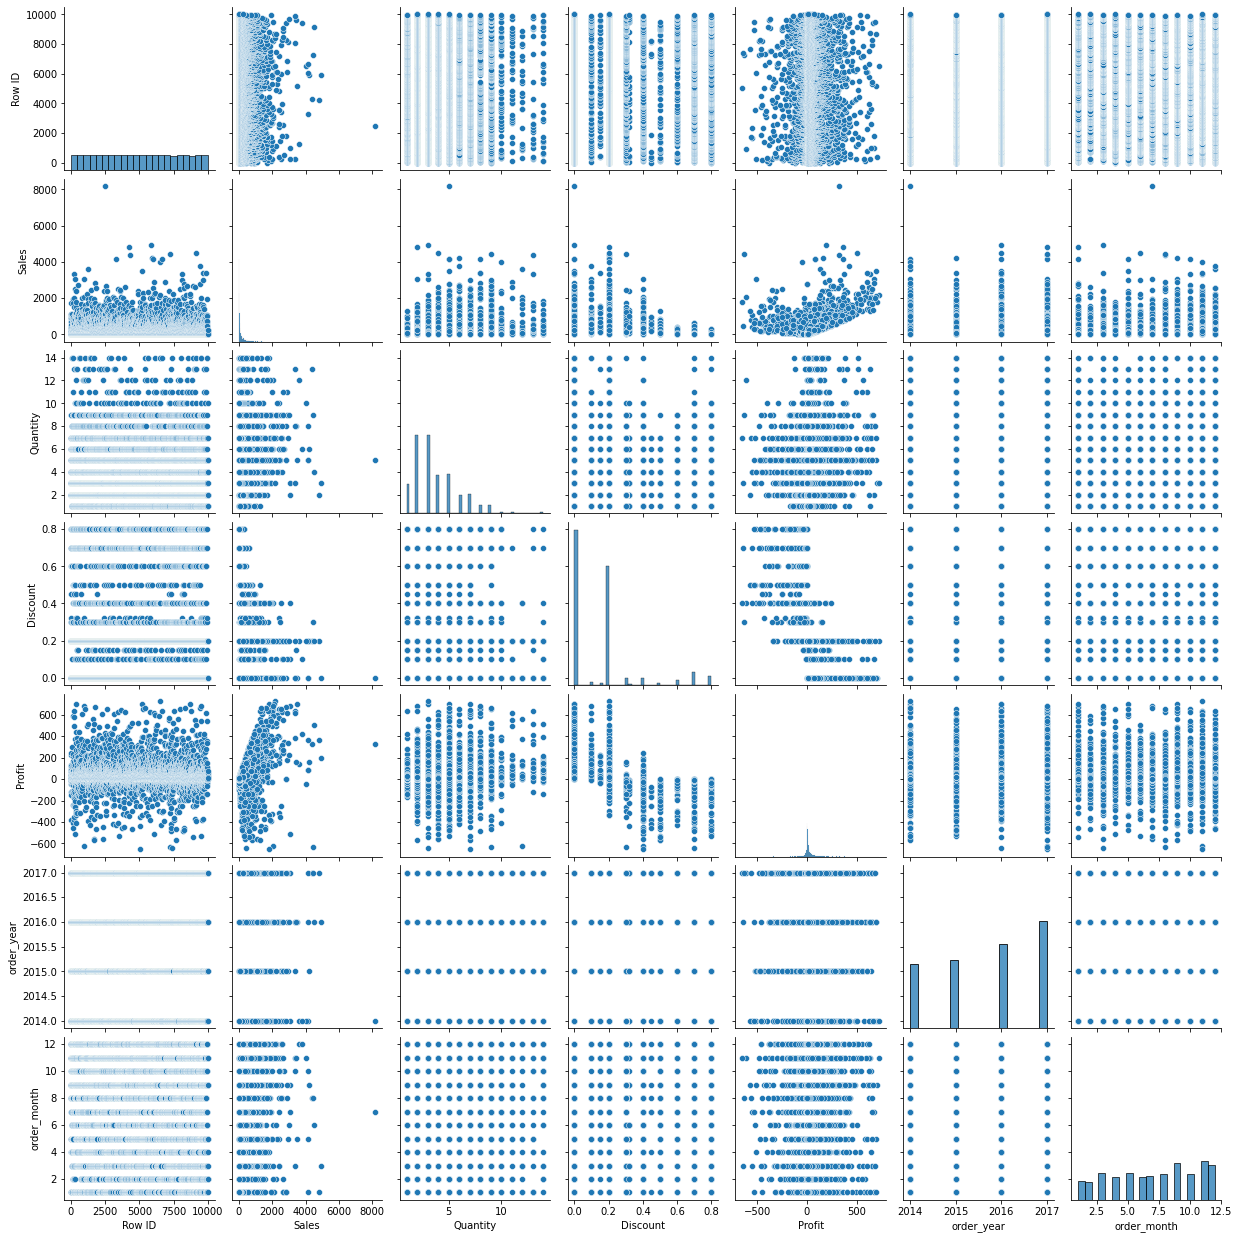

In [ ]:
sns.pairplot(df)

In [ ]:
sns.set_color_codes("pastel")
sns.set(rc={"figure.figsize":(18, 10)} )

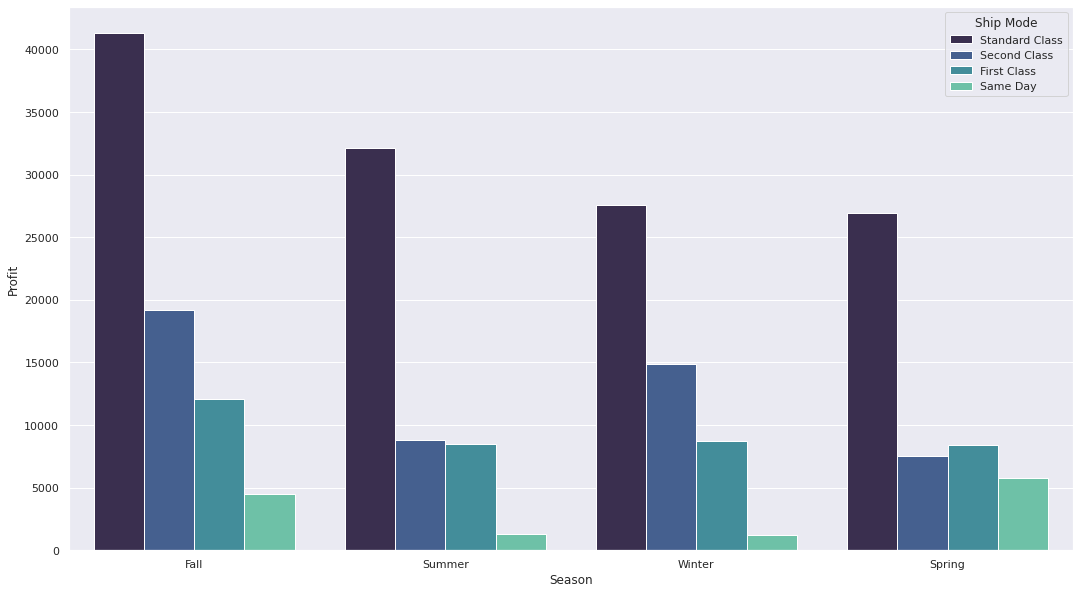

In [ ]:
#Profit per ship mode in each season
profitable_shipmode = pd.DataFrame(df.groupby(['Ship Mode','Season']).sum()['Profit'])
profitable_shipmode.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(x= "Season", y="Profit", data= profitable_shipmode.reset_index(), palette="mako" ,hue = 'Ship Mode')

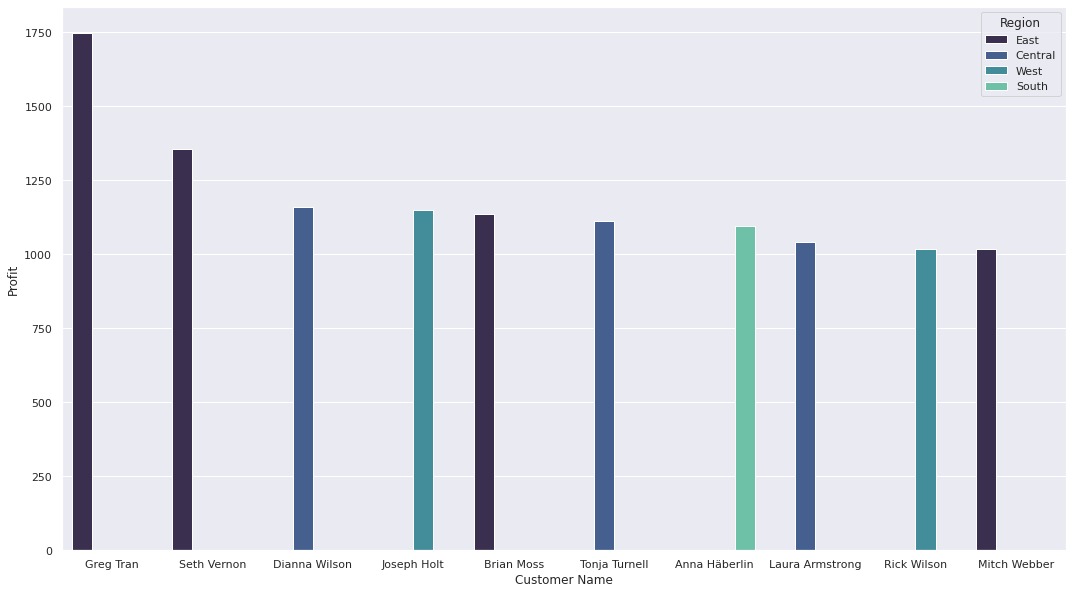

In [ ]:
#Top 10 most profitable customers and their regions
profitable_cusname = pd.DataFrame(df.groupby(['Customer Name','Region']).sum()['Profit'])
profitable_cusname.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_cusname = profitable_cusname.iloc[:10]
sns.barplot(x= "Customer Name", y="Profit", data= profitable_cusname.reset_index(), palette = 'mako', hue= 'Region')

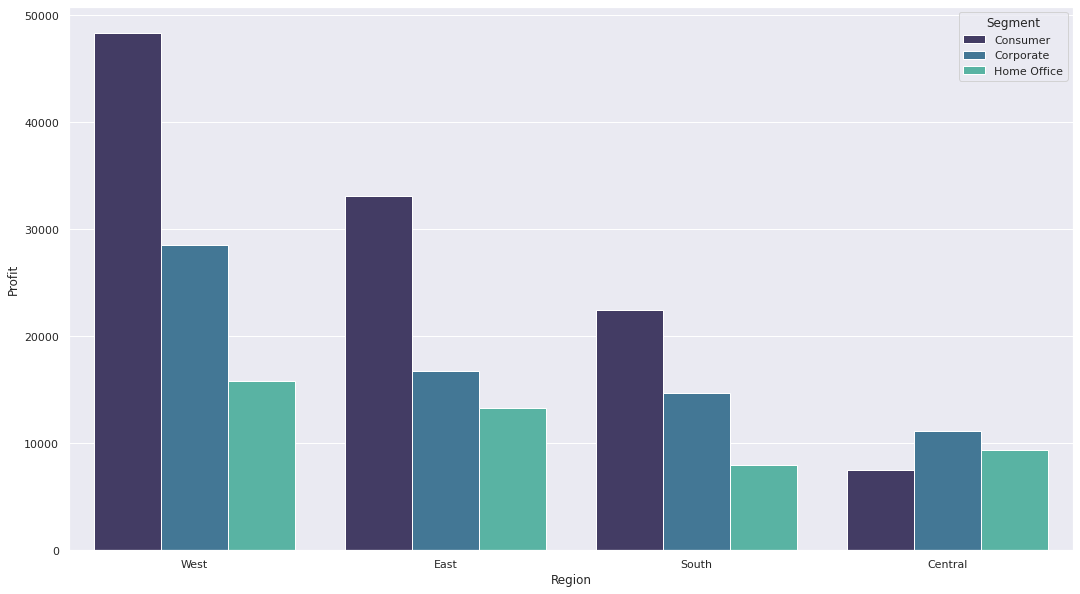

In [ ]:
#profit per region in each segment 
profitable_segment = pd.DataFrame(df.groupby(['Segment','Region']).sum()['Profit'])
profitable_segment.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(x= "Region", y="Profit", data= profitable_segment.reset_index(),hue='Segment',palette = 'mako')

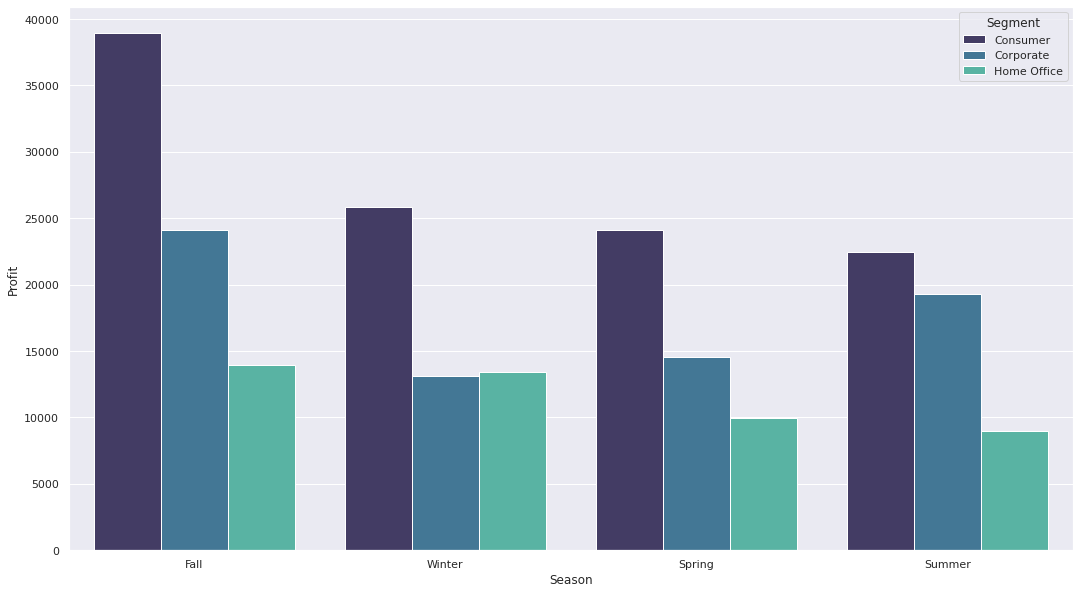

In [ ]:
#profit per season in each segment
profitable_segment_season = pd.DataFrame(df.groupby(['Segment','Season']).sum()['Profit'])
profitable_segment_season.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(x= "Season", y="Profit", data= profitable_segment_season.reset_index(),hue='Segment',palette = 'mako')

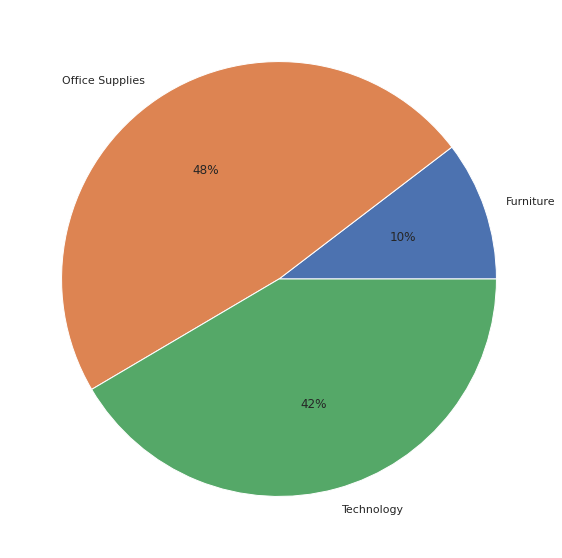

In [ ]:
#Category wise profit contribution
pie = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])
pie['Percentage'] = [i/df['Profit'].sum()*100 for i in pie['Profit']]
plt.pie(x = pie['Percentage'], labels = pie.index, autopct='%.0f%%')
plt.show()

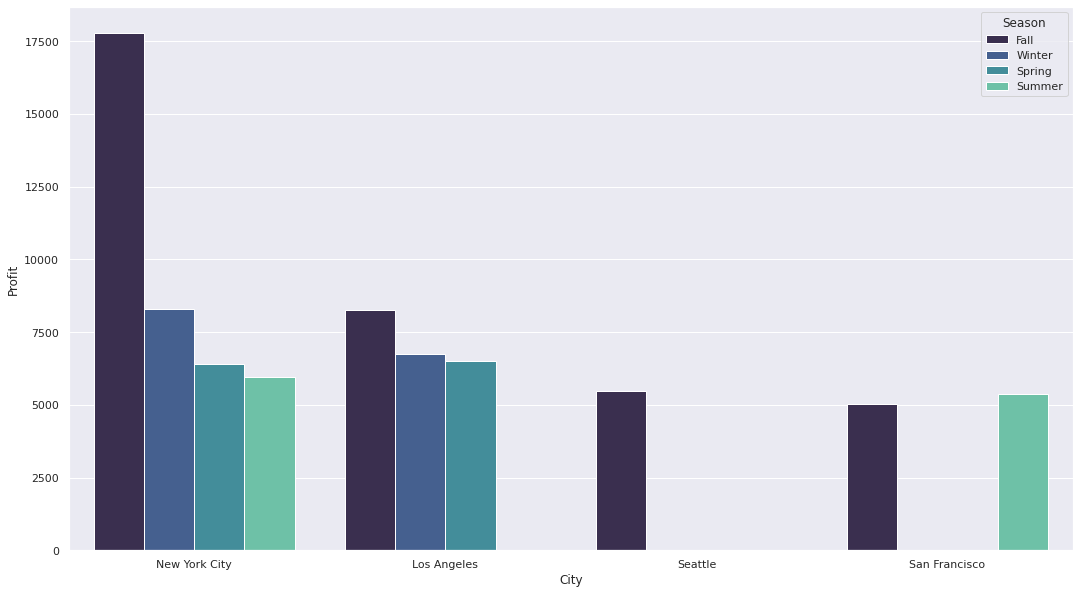

In [ ]:
#top 4 cities profit by season
profitable_city = pd.DataFrame(df.groupby(['City','Season']).sum()['Profit'])
profitable_city.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_city = profitable_city.iloc[:10]
sns.barplot(x='City', y="Profit", data= profitable_city.reset_index(), hue= 'Season',palette='mako')

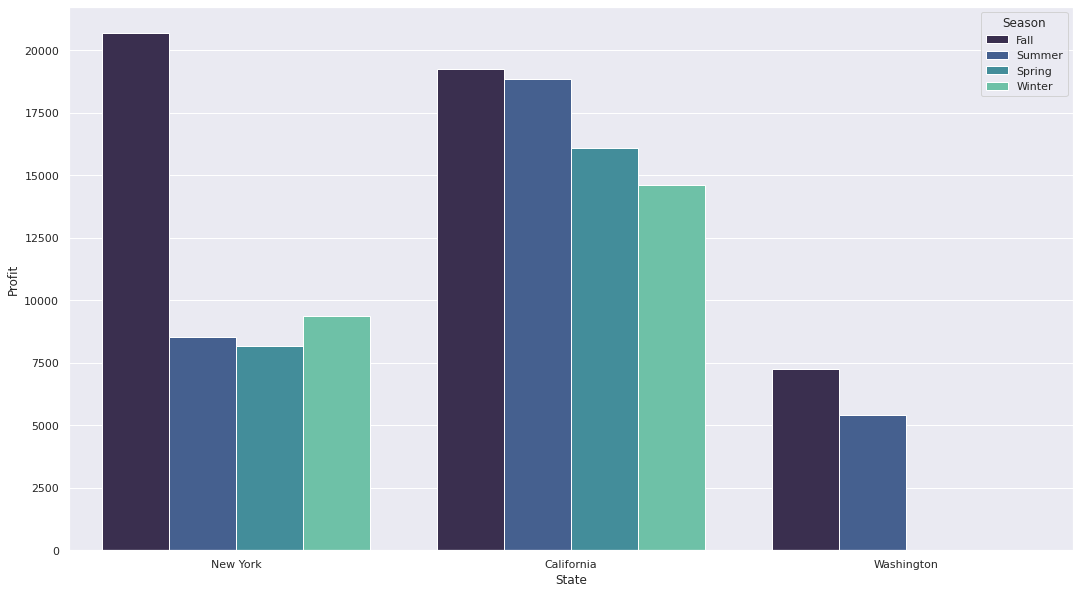

In [ ]:
#top 3 states profit by season
profitable_state = pd.DataFrame(df.groupby(['State','Season']).sum()['Profit'])
profitable_state.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_state = profitable_state.iloc[:10]
sns.barplot(x='State', y="Profit", data= profitable_state.reset_index(), hue='Season',palette='mako')

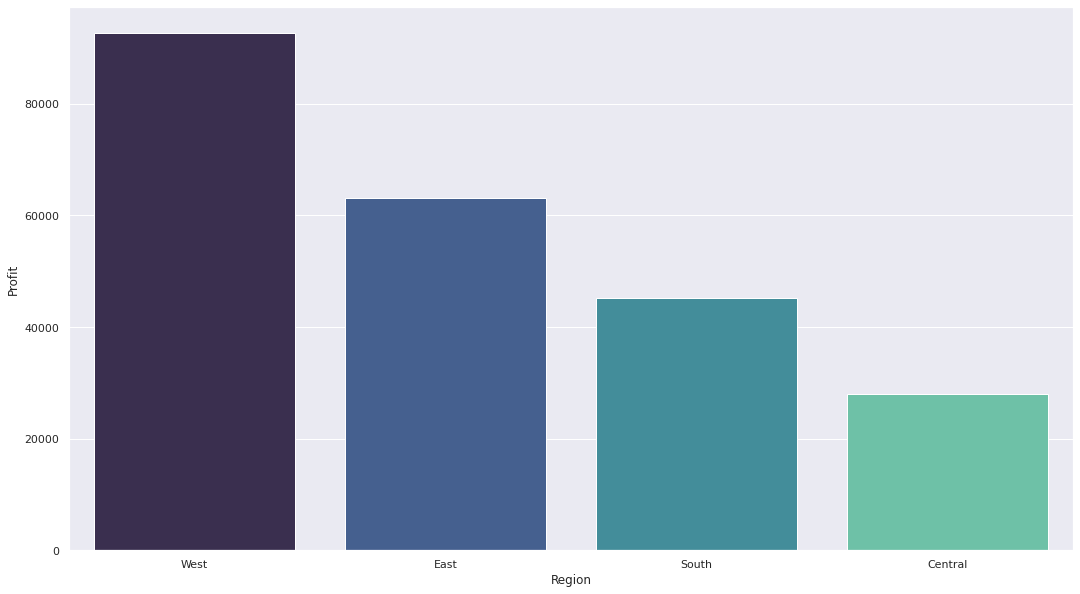

In [ ]:
#region wise profit count
profitable_region= pd.DataFrame(df.groupby(['Region']).sum()['Profit'])
profitable_region.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(data=profitable_region.reset_index(), x="Region", y="Profit", palette='mako')

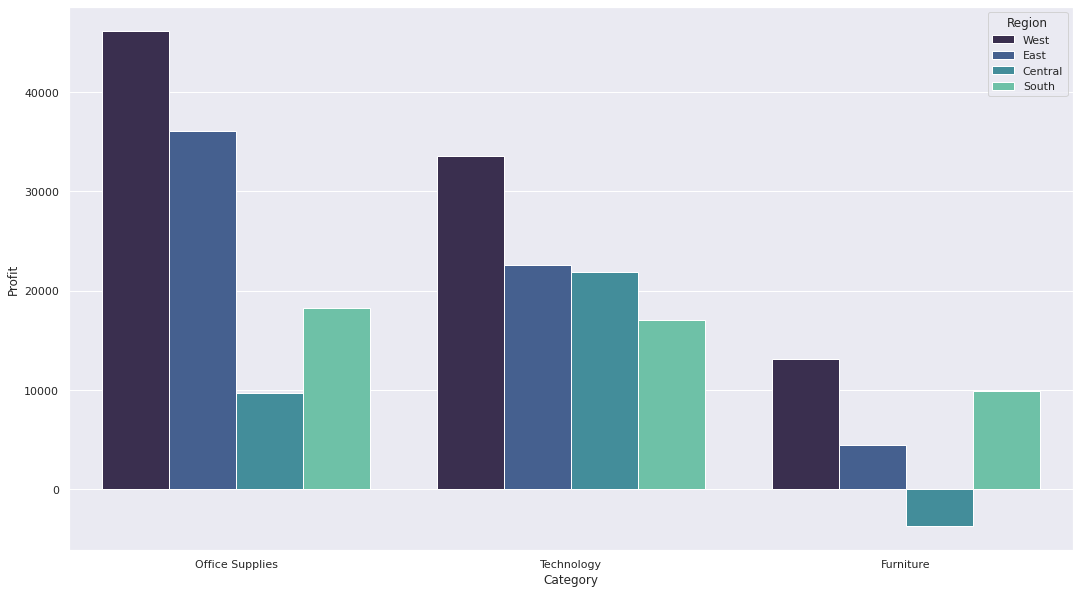

In [ ]:
#category wise profit count per region
profitable_category= pd.DataFrame(df.groupby(['Category','Region']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(data=profitable_category.reset_index(),x='Category',y='Profit',hue='Region',palette='mako')

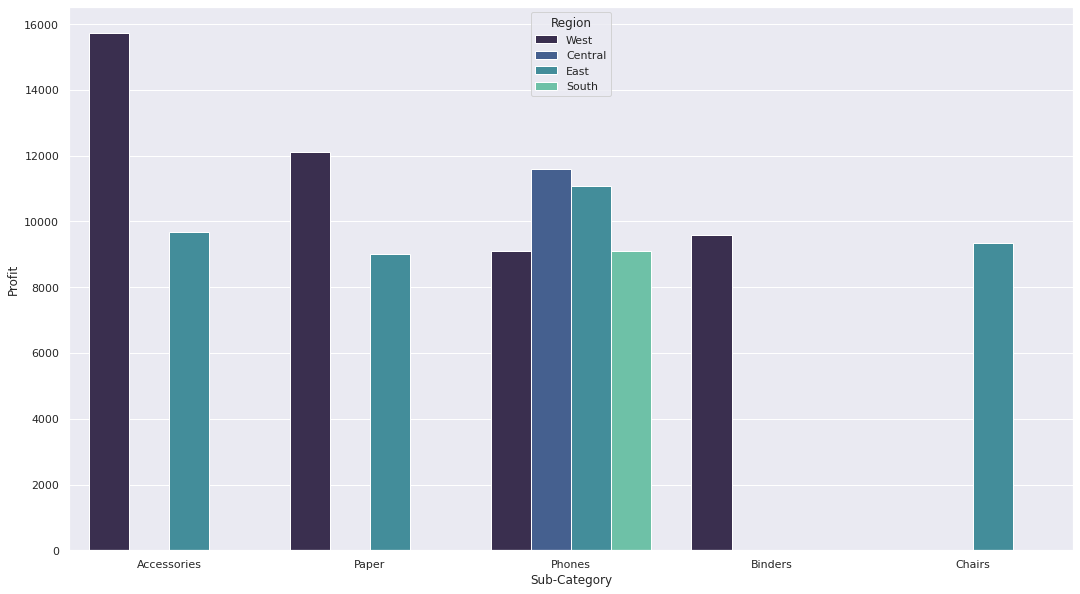

In [ ]:
profitable_subcategory= pd.DataFrame(df.groupby(['Sub-Category','Region']).sum()['Profit'])
profitable_subcategory.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_subcategory = profitable_subcategory.iloc[:10]
sns.barplot(data=profitable_subcategory.reset_index(),x='Sub-Category',y='Profit',hue='Region', palette='mako')

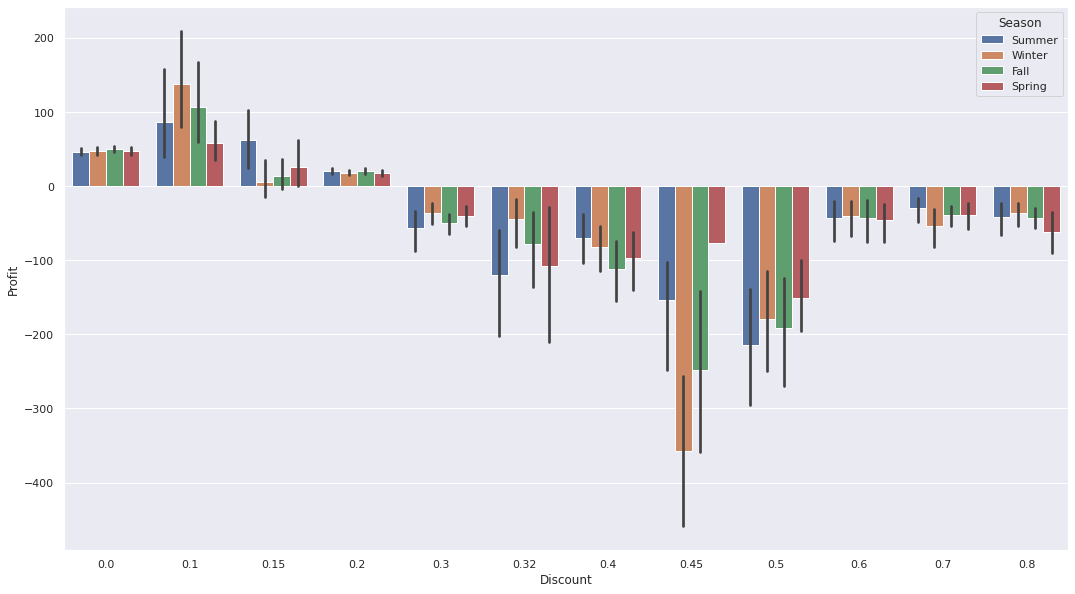

In [ ]:
sns.barplot(df['Discount'],df['Profit'],hue=df['Season'])

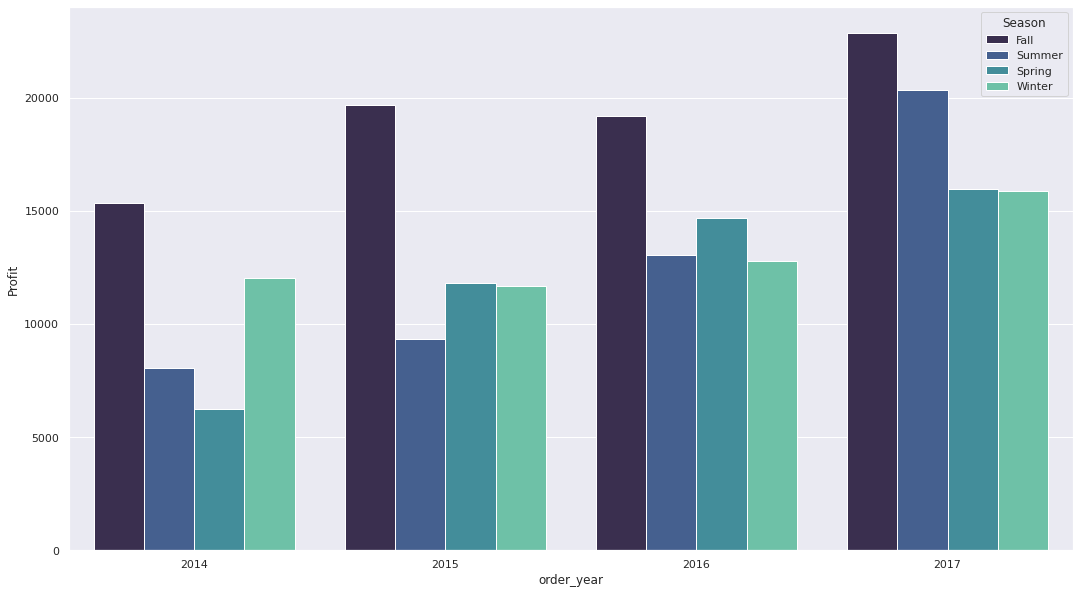

In [ ]:
#profit in each year by season
profitable_orderyear= pd.DataFrame(df.groupby(['order_year','Season']).sum()['Profit'])
profitable_orderyear.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(data=profitable_orderyear.reset_index(),x='order_year',y='Profit',hue='Season',palette='mako')

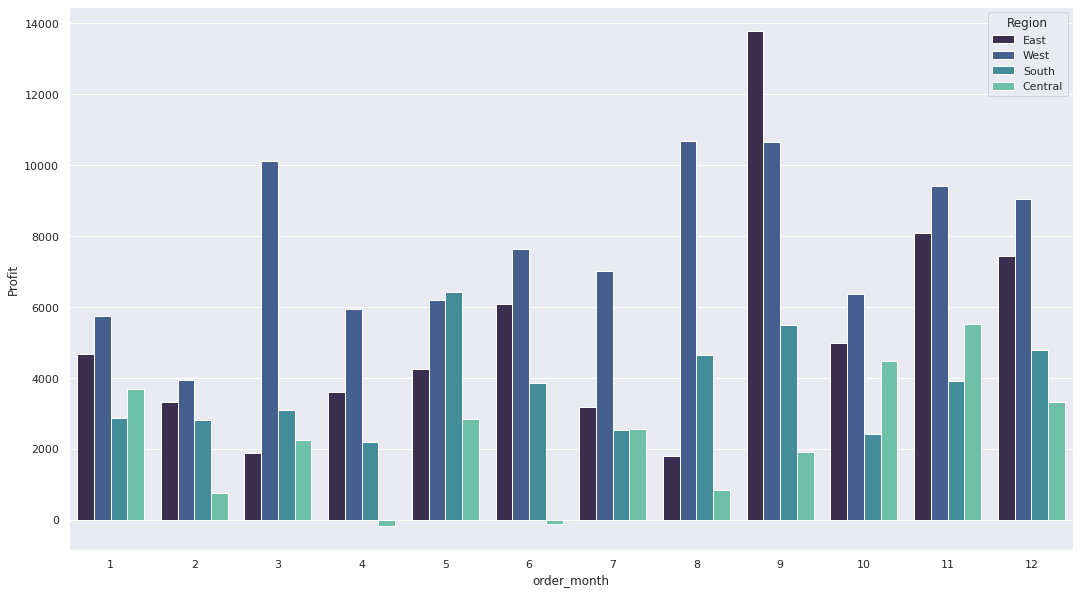

In [ ]:
#profit per month by region
profitable_ordermonth= pd.DataFrame(df.groupby(['order_month','Region']).sum()['Profit'])
profitable_ordermonth.sort_values(by=['Profit'], inplace = True, ascending = False)
sns.barplot(data=profitable_ordermonth.reset_index(),x='order_month',y='Profit',hue='Region',palette='mako')

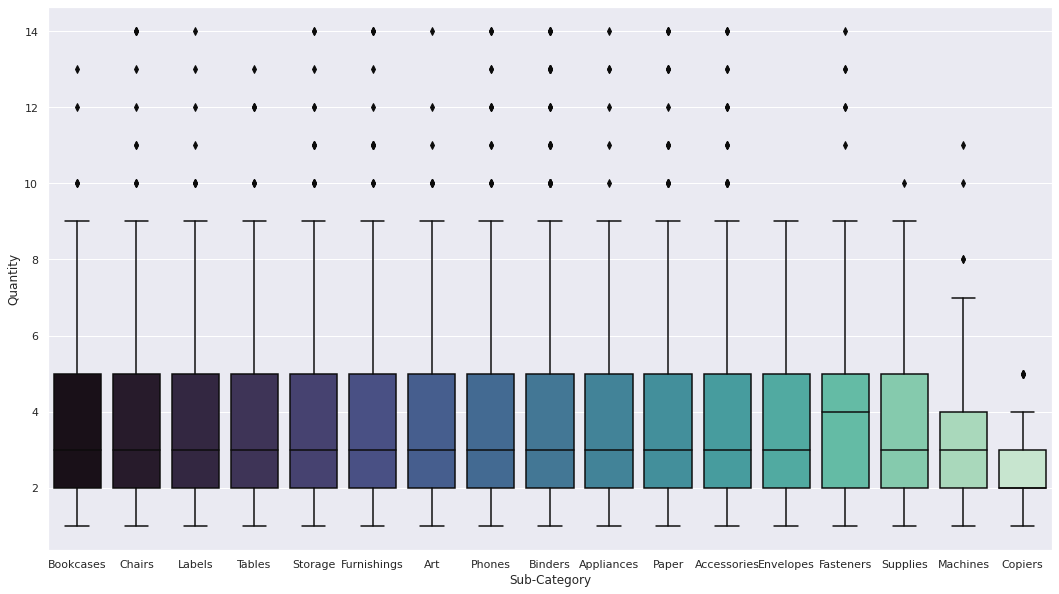

In [ ]:
sns.boxplot(data = df, x='Sub-Category', y='Quantity', palette='mako')

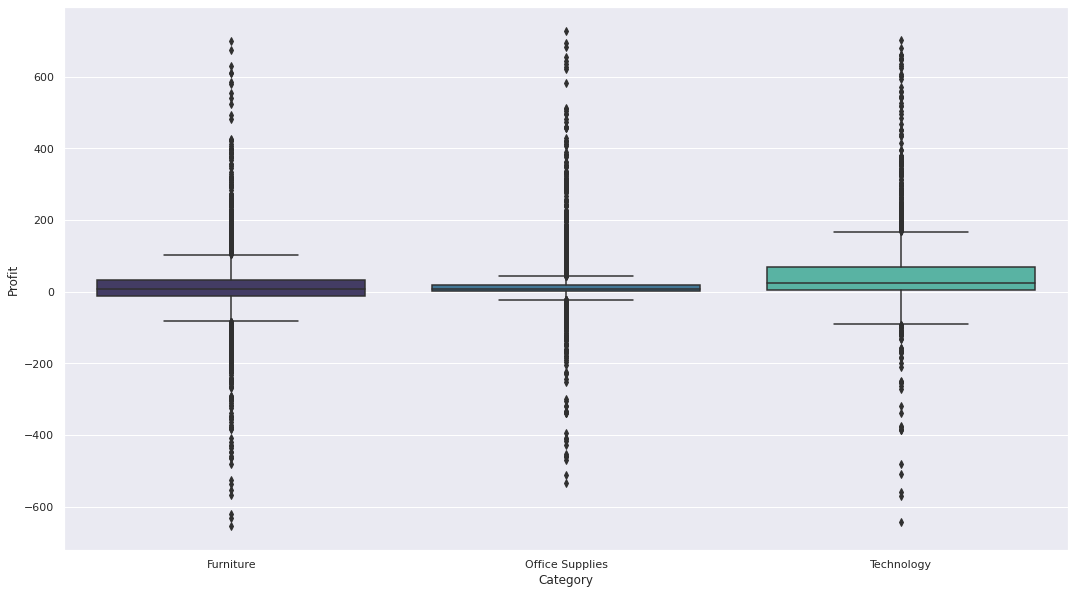

In [ ]:
sns.boxplot(data=df, x='Category', y='Profit', palette='mako')

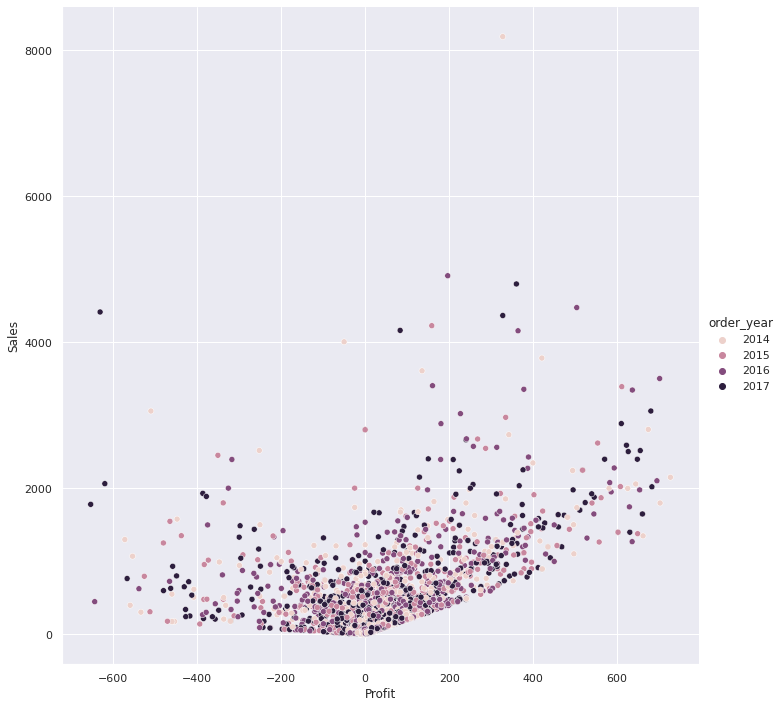

In [ ]:
sns.relplot(data=df, y='Sales',x='Profit',hue='order_year', height=10)

In [ ]:
subcategory_profit = df.groupby('Sub-Category').agg({'Profit': 'sum'}).sort_values('Profit',ascending=False)

              Quantity
Sub-Category          
Binders           5790
Paper             5178
Furnishings       3563
Phones            3264
Storage           3151
Art               3000
Accessories       2954
Chairs            2339
Appliances        1693
Labels            1400
Tables            1200
Fasteners          914
Envelopes          906
Bookcases          849
Supplies           637
Machines           310
Copiers            130


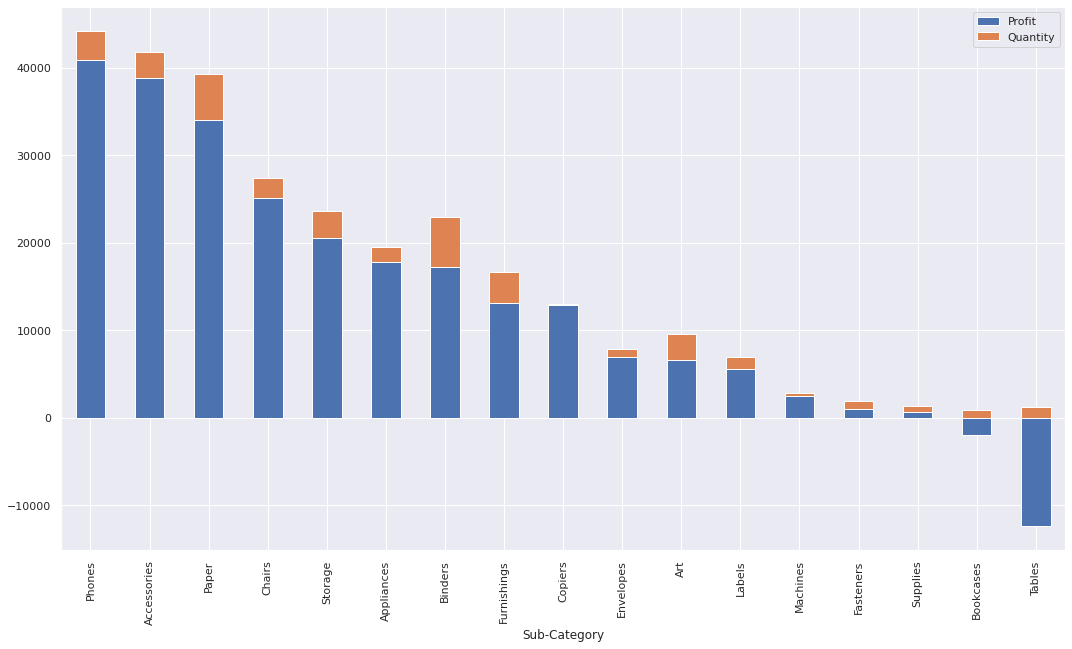

In [ ]:
subcategory_quant = df.groupby('Sub-Category').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)
print(subcategory_quant)

subcategory_profit["Quantity"] = subcategory_quant['Quantity']
subcategory_profit.plot(kind="bar", stacked=True)

In [ ]:
#subcategory_Sales = pd.DataFrame(df.groupby('Sub-Category').sum()['Sales'])
#subcategory_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
#subcategory_Sales

In [ ]:
#df.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

##Label Encoding and Corelation matrix

In [ ]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_month,Season
0,1,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,8,Summer
1,2,2016-08-11,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,8,Summer
2,3,2016-12-06,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,12,Winter
3,4,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,11,Fall
4,5,2015-11-10,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,11,Fall


In [ ]:
df2 = df.drop(columns = {'Order Date','Ship Date','Row ID','Country'})
df2 = df2.drop(columns = {'Customer Name'})
#df2.head()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df2['Segment']= label_encoder.fit_transform(df2['Segment'])
df2['Region']= label_encoder.fit_transform(df2['Region'])
df2['Category']= label_encoder.fit_transform(df2['Category'])
df2['Sub-Category']= label_encoder.fit_transform(df2['Sub-Category'])
df2['Ship Mode']= label_encoder.fit_transform(df2['Ship Mode'])
df2['City']= label_encoder.fit_transform(df2['City'])
df2['State']= label_encoder.fit_transform(df2['State'])
df2['order_year'] = label_encoder.fit_transform(df2['order_year'])
df2['Quantity'] = label_encoder.fit_transform(df2['Quantity'])
df2['order_month'] = label_encoder.fit_transform(df2['order_month'])
df2['Season'] = label_encoder.fit_transform(df2['Season'])

#df2.head()

In [ ]:
df2['Sales'] = scale(df2['Sales'])
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_month,Season
0,2,0,194,15,2,0,4,0.184101,1,0.00,41.9136,2,7,2
1,2,0,194,15,2,0,5,1.437418,2,0.00,219.5820,2,7,2
2,2,1,266,3,3,1,10,-0.475492,1,0.00,6.8714,2,11,3
3,3,0,153,8,2,0,16,2.039135,4,0.45,-383.0310,1,10,0
4,3,0,153,8,2,1,14,-0.454830,1,0.20,2.5164,1,10,0


In [ ]:
df2 = df2.drop(columns = {'City','State','Region'})

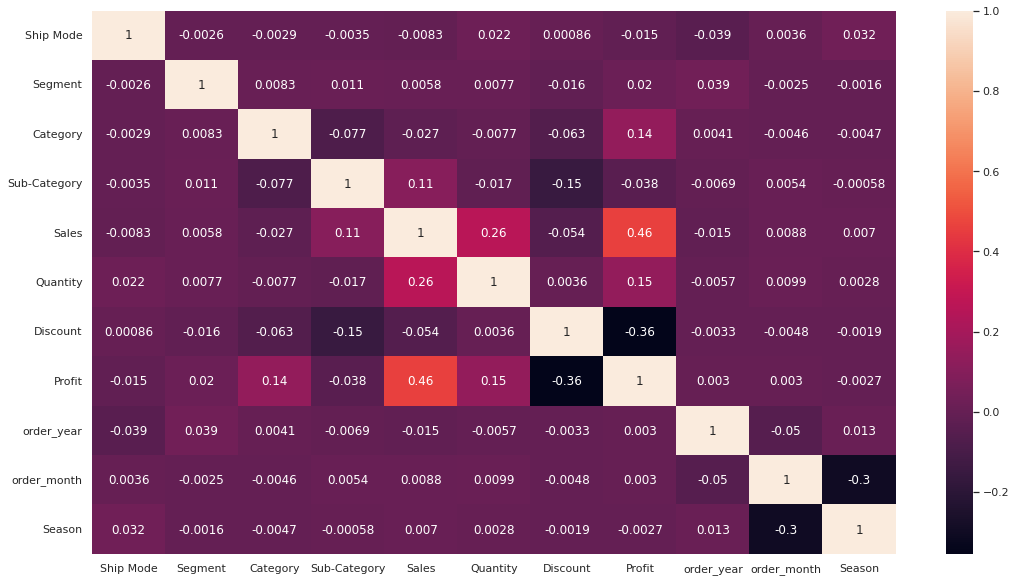

In [ ]:
matrix2 = df2.corr()
sns.heatmap(matrix2, annot = True)

##Prediction 

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_root_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    

In [ ]:
def metrics(X_test,y_pred, y_test, model):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    errors = abs(y_pred - y_test)
    mae = np.mean(errors)
    print('Mean Absolute Error: ', round(mae, 4))

    
    # Calculate and display accuracy
    test_accuracy = 100 * model.score(X_test,y_test)
    print('Test Set Accuracy (from Mean Absolute Percentage Error):{:.3f}%'.format(test_accuracy))

In [ ]:
def normalized_mse(y_test, y_pred):
  mse = np.mean((y_test - y_pred)**2)
  variance = np.var(y_test)
  return mse / variance

In [ ]:
metrics = []
metrics = pd.DataFrame(metrics)

In [ ]:
y = df2['Profit']
X = df2.drop(columns = {'Profit'})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [ ]:
X_train[["order_year", "order_month","Sales","Discount"]] = df[["order_year", "order_month","Sales","Discount"]].apply(pd.to_numeric)
X_train.astype({'Sales': 'int64','Discount':'int64','Quantity':'int64'}).dtypes
y_train.astype('int64').dtypes

dtype('int64')

### Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
scores = []
bagscore = []

In [ ]:
adalr = AdaBoostRegressor(base_estimator = lr, n_estimators=150, learning_rate=0.01)

In [ ]:
baglr = BaggingRegressor(base_estimator = lr, n_estimators=10, random_state=42)

In [ ]:
lr.fit(X_train, y_train)
baglr.fit(X_train, y_train)
adalr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_bagpred = baglr.predict(X_test)
y_adapred = adalr.predict(X_test)

In [ ]:
#lr normalized mse
lr_mse = round(normalized_mse(y_test,y_pred),3)
#baglr normalized mse
baglr_mse = round(normalized_mse(y_test,y_bagpred), 3)
#adalr normalized mse
adalr_mse = round(normalized_mse(y_test,y_pred), 3)

In [ ]:
#lr r2 score
lr_r2 = round(r2_score(y_pred,y_test),3)
#baglr r2 score
baglr_r2 = round(r2_score(y_bagpred,y_test),3)
#adalr r2 score
adalr_r2 = round(r2_score(y_adapred,y_test),3)

In [ ]:
#train
scores = cross_val_score(estimator= lr, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'lr'))

MAE: 37.63 (+/- 0.71) [lr]


In [ ]:
#test
scores = cross_val_score(estimator= lr, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'lr'))

MAE: 35.06 (+/- 2.72) [lr]


###Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
scores3 = []
snakes = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=53)
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(X_test)

In [ ]:
bagdtr = BaggingRegressor(base_estimator = dtr, n_estimators=10, random_state=42)
bagdtr.fit(X_train,y_train)
y_bagpred = bagdtr.predict(X_test)

In [ ]:
adadtr = AdaBoostRegressor(base_estimator = dtr, n_estimators=150, learning_rate=0.01)
adadtr.fit(X_train,y_train)
y_adapred = adadtr.predict(X_test)

In [ ]:
#dtr normalized mse
dtr_mse = round(normalized_mse(y_test,y_pred),3)
#bagdtr normalized mse
bagdtr_mse = round(normalized_mse(y_test,y_bagpred),3)
#adadtr normalized mse
adadtr_mse = round(normalized_mse(y_test,y_pred),3)

In [ ]:
#dtr r2 score
dtr_r2 = round(r2_score(y_pred,y_test),3)
#bagdtr r2 score
bagdtr_r2 = round(r2_score(y_bagpred,y_test),3)
#adadtr r2 score
adadtr_r2 = round(r2_score(y_adapred,y_test),3)

In [ ]:
#train
scores = cross_val_score(estimator= adadtr, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'adadtr'))

MAE: 12.82 (+/- 0.46) [adadtr]


In [ ]:
#test
scores = cross_val_score(estimator= adadtr, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'adadtr'))

MAE: 16.01 (+/- 2.51) [adadtr]


###Extra trees regressor 

In [ ]:
extra = ExtraTreesRegressor()

In [ ]:
extra.fit(X_train,y_train)
y_pred = extra.predict(X_test)

In [ ]:
#extra normalized mse
extra_mse = round(normalized_mse(y_test,y_pred),3)

In [ ]:
#train
scores = cross_val_score(estimator= extra, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'extra'))

MAE: 13.38 (+/- 0.40) [extra]


In [ ]:
#test
scores = cross_val_score(estimator= extra, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'extra'))

MAE: 15.90 (+/- 2.01) [extra]


In [ ]:
#extra r2_score
extra_r2 = round(r2_score(y_test,y_pred),3)

In [ ]:
#Grid search tuning 

et_model = ExtraTreesRegressor(random_state = 42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [35, 40, 45],
    'max_features': [.4, .6, 'auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 7],
    'n_estimators': [100, 250, 400]
}

et_model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, et_model, param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-et_model.best_score_))
print(et_model.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
5.8948148656345705
{'bootstrap': True, 'max_depth': 35, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}


In [ ]:
#base_accuracy = evaluate(extra, X_test, y_test.values)
et_best_model = et_model.best_estimator_
y_pred_et_best_model = et_best_model.predict(X_test)
#best_accuracy = evaluate(et_best_model, X_test, y_test.values)

In [ ]:
#tuning normalized mse
etra_hyper_mse = round(normalized_mse(y_test, y_pred_et_best_model),3)

In [ ]:
extra_hyper_r2 = round(r2_score(y_test,y_pred_et_best_model),3)

###Random Forest

In [ ]:
scores4 =[]

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf.fit(X_train,y_train)
acc = rf.score(X_test,y_test)
y_pred = rf.predict(X_test)

In [ ]:
#rf normalized mse
rf_mse = round(normalized_mse(y_test,y_pred),3)

In [ ]:
#r2 score rf
rf_r2 = round(r2_score(y_test,y_pred),3)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 25, 30],
    'max_features': [.4, 'auto'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1, 3, 5],
    'n_estimators': [100,400]
}

# Create a based model
rfr = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
rfr, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, rfr, param_grid, cv=5)

# Root Mean Squared Error
#print(np.sqrt(-rfr.best_score_))
#print(rfr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
#print('Base Model:')
#base_accuracy = evaluate(rf, X_test, y_test.values)
#print()
#print('Model after Tuning:')
rfr_best_model = rfr.best_estimator_
#best_accuracy = evaluate(rfr_best_model, X_test, y_test.values)

In [ ]:
y_pred_rfr_best_model = rfr_best_model.predict(X_test)
#print('Random Forest Model (After Tuning) Metrics:')
#metrics(X_test,y_pred, y_test.values,rfr_best_model)

In [ ]:
rf_hyper_mse = round(normalized_mse(y_test,y_pred_rfr_best_model),3)

In [ ]:
rf_hyper_r2 = round(r2_score(y_test,y_pred_rfr_best_model),3)

In [ ]:
#train
scores = cross_val_score(estimator= rf, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'rf'))

MAE: 13.48 (+/- 0.49) [rf]


In [ ]:
#test
scores = cross_val_score(estimator= rf, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'rf'))

MAE: 15.97 (+/- 2.50) [rf]


###LightGBM

In [ ]:
lgbm_base_model = lgb.LGBMRegressor(random_state=42)
lgbm_base_model.fit(X_train, y_train.values.ravel())

LGBMRegressor(random_state=42)

In [ ]:
y_pred = lgbm_base_model.predict(X_test)

In [ ]:
#lgbm normalized mse
lgbm_mse = round(normalized_mse(y_test,y_pred),3)

In [ ]:
#lgbm r2 score
lgbm_r2 = round(r2_score(y_test,y_pred),3)

In [ ]:
#Gridcv
param_grid = {
    'n_estimators': [100, 150],
    'colsample_bytree': [0.8, 1.0, 1.2],
    'max_depth': [-1, 5, 10],
    'reg_alpha': [0.4, 0.5, 0.6],
    'reg_lambda': [0.2, 0.3, 0.4,],
    'subsample': [0.8, 0.9, 1],
    'num_leaves': [30,31,32]
}

# Create a based model
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, lgbm, param_grid, cv=4)

# Root Mean Squared Error
print(np.sqrt(-lgbm.best_score_))
print(lgbm.best_params_)


Fitting 4 folds for each of 1458 candidates, totalling 5832 fits
5.968039920546275
{'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 30, 'reg_alpha': 0.5, 'reg_lambda': 0.4, 'subsample': 0.8}


In [ ]:
lgbm_base_model = lgb.LGBMRegressor()
lgbm_base_model.fit(X_train, y_train.values.ravel())
#base_accuracy = evaluate(lgbm_base_model, X_test, y_test.values)
lgbm_best_model = lgbm.best_estimator_
#best_accuracy = evaluate(lgbm_best_model, X_test, y_test.values)

In [ ]:
y_pred_lgbm_best_model = lgbm_best_model.predict(X_test)
#print('LightGBM Model (After Tuning) Metrics:')
#metrics(X_test,y_pred, y_test.values,lgbm_best_model)

In [ ]:
#lgbm hyper normlaized mse
lgbm_hper_mse = round(normalized_mse(y_test,y_pred_lgbm_best_model),3)

In [ ]:
#lgbm hyper r2 score
lgbm_hyper_r2 = round(r2_score(y_test,y_pred_lgbm_best_model),3)

In [ ]:
#train
scores = cross_val_score(estimator= lgbm_base_model, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'lgbm'))

MAE: 14.30 (+/- 0.25) [lgbm]


In [ ]:
#test
scores = cross_val_score(estimator= rf, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'rf'))

MAE: 15.97 (+/- 2.50) [rf]


###XGboost

In [ ]:
xgb_base_model = xgb.XGBRegressor(random_state = 42)
xgb_base_model.fit(X_train, y_train.values.ravel())

[16:57:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
y_pred = xgb_base_model.predict(X_test)

In [ ]:
#xgb normlaized mse
xgb_mse = round(normalized_mse(y_test,y_pred),3)

In [ ]:
#xgb r2 score
xgb_r2 = round(r2_score(y_test,y_pred),3)

In [ ]:
#gridsearch cv

xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'colsample_bytree': [0.9, 1.0, 1.1],
    'max_depth': [2, 5, 10],
    'reg_alpha': [1.0, 1.2, 1.3],
    'reg_lambda': [ 1.2, 1.3, 1.4],
    'subsample': [0.9, 1.0]
}

xgb_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, xgb_model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-xgb_model.best_score_))
print(xgb_model.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[17:11:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.854500899928992
{'colsample_bytree': 0.9, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1.2, 'reg_lambda': 1.3, 'subsample': 0.9}


In [ ]:
#print('Base Model:')
#base_accuracy = evaluate(xgb_base_model, X_test, y_test.values)
#print()
#print('Model after Tuning:')
xgb_best_model = xgb_model.best_estimator_
#best_accuracy = evaluate(xgb_best_model, X_test, y_test.values)

In [ ]:
y_pred_xgb_best_model = xgb_best_model.predict(X_test)
#print('XGBoost Model (After Tuning) Metrics:')
#metrics(X_test,y_pred, y_test.values,xgb_best_model)

In [ ]:
#xgb hyper mse
xgb_hyper_mse = round(normalized_mse(y_test,y_pred_xgb_best_model),3)

In [ ]:
#xgb hyper r2 score
xgb_hyper_r2 = round(r2_score(y_test,y_pred_xgb_best_model),3)

In [ ]:
#train
scores = cross_val_score(estimator= xgb_best_model, X=X_train, y=y_train, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'xgb'))

[17:11:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 14.28 (+/- 0.37) [xgb]


In [ ]:
#test
scores = cross_val_score(estimator= xgb_best_model, X=X_test, y=y_test, cv=5, scoring="neg_mean_absolute_error")
baseline_lr = round(-scores.mean(), 2)
print("MAE: %0.2f (+/- %0.2f) [%s]"% (-scores.mean(), scores.std(), 'rf'))

[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 16.34 (+/- 2.34) [rf]


###DNN

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test,y_test), callbacks=callbacks_list)

Epoch 1/150
238/248 [===========================>..] - ETA: 0s - loss: 35.1810 - mean_absolute_error: 35.1810
Epoch 1: val_loss improved from inf to 29.02635, saving model to Weights.hdf5
248/248 [==============================] - 2s 6ms/step - loss: 35.0826 - mean_absolute_error: 35.0826 - val_loss: 29.0264 - val_mean_absolute_error: 29.0264
Epoch 2/150
247/248 [============================>.] - ETA: 0s - loss: 30.5061 - mean_absolute_error: 30.5061
Epoch 2: val_loss improved from 29.02635 to 27.02197, saving model to Weights.hdf5
248/248 [==============================] - 1s 5ms/step - loss: 30.4977 - mean_absolute_error: 30.4977 - val_loss: 27.0220 - val_mean_absolute_error: 27.0220
Epoch 3/150
241/248 [============================>.] - ETA: 0s - loss: 27.6714 - mean_absolute_error: 27.6714
Epoch 3: val_loss improved from 27.02197 to 24.42991, saving model to Weights.hdf5
248/248 [==============================] - 1s 5ms/step - loss: 27.4338 - mean_absolute_error: 27.4338 - val_loss

In [ ]:
wights_file = 'Weights.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = NN_model.predict(X_test)

62/62 [==============================] - 0s 2ms/step


In [ ]:
NN_r2 = round(r2_score(predictions,y_test),3)

In [ ]:
mean_absolute_error(y_test, predictions)

14.233125509117528

In [ ]:
predictions = predictions.reshape(-1)

In [ ]:
NN_mse = round(normalized_mse(y_test, predictions),3)

## Metrics

In [ ]:
table = [['Model','Normalized MSE','r2 score'],
         ['Linear Regression',lr_mse,lr_r2],
         ['Linear Regression (Bagging)',baglr_mse,baglr_r2],
         ['Linear Regression (AdaBoost)',adalr_mse,adalr_r2],
         ['Decision Tree Regressor',dtr_mse,dtr_r2],
         ['Decision Tree Regressor (Bagging)',bagdtr_mse,bagdtr_r2],
         ['Decision Tree Regressor (AdaBoost)',adadtr_mse,adadtr_r2],
         ['Extra Trees',extra_mse,extra_r2],
         ['Hyper Tuned Extra Trees',etra_hyper_mse,extra_hyper_r2],
         ['Random Forest',rf_mse,rf_r2],
         ['Hyper Tuned Random Forest',rf_hyper_mse,rf_hyper_r2],
         ['LightGBM Regressor',lgbm_mse,lgbm_r2],
         ['Hyper Tuned LightGBM Regressor',lgbm_hper_mse,lgbm_hyper_r2],
         ['XGBoost Regressor',xgb_mse,xgb_r2],
         ['Hyper Tuned XGBoost Regressor',xgb_hyper_mse,xgb_hyper_r2],
         ['NN',NN_mse,NN_r2]]

In [ ]:
print(tabulate(table))

----------------------------------  --------------  ---------
Model                               Normalized MSE  r2 score
Linear Regression                   240.729         -1354.364
Linear Regression (Bagging)         173.552         -994.399
Linear Regression (AdaBoost)        240.729         -102.065
Decision Tree Regressor             0.185           0.824
Decision Tree Regressor (Bagging)   0.132           0.846
Decision Tree Regressor (AdaBoost)  0.185           0.861
Extra Trees                         0.117           0.883
Hyper Tuned Extra Trees             0.127           0.873
Random Forest                       0.122           0.878
Hyper Tuned Random Forest           0.121           0.879
LightGBM Regressor                  0.143           0.857
Hyper Tuned LightGBM Regressor      0.141           0.859
XGBoost Regressor                   0.161           0.839
Hyper Tuned XGBoost Regressor       0.129           0.871
NN                                  0.181           0.7

In [ ]:
metrics = pd.DataFrame(table)
metrics.columns = metrics.iloc[0]
metrics = metrics.iloc[1:]
metrics.set_index('Model', inplace=True)

In [ ]:
print(metrics['r2 score'].max())
print(metrics['Normalized MSE'].min())

0.883
0.117


In [ ]:
metrics = metrics.drop(metrics.index[:3])

In [ ]:
metrics.sort_values(by=['r2 score'])

,Normalized MSE,r2 score
Model,,
NN,0.181,0.78
Decision Tree Regressor,0.185,0.824
XGBoost Regressor,0.161,0.839
Decision Tree Regressor (Bagging),0.132,0.846
LightGBM Regressor,0.143,0.857
Hyper Tuned LightGBM Regressor,0.141,0.859
Decision Tree Regressor (AdaBoost),0.185,0.861
Hyper Tuned XGBoost Regressor,0.129,0.871
Hyper Tuned Extra Trees,0.127,0.873


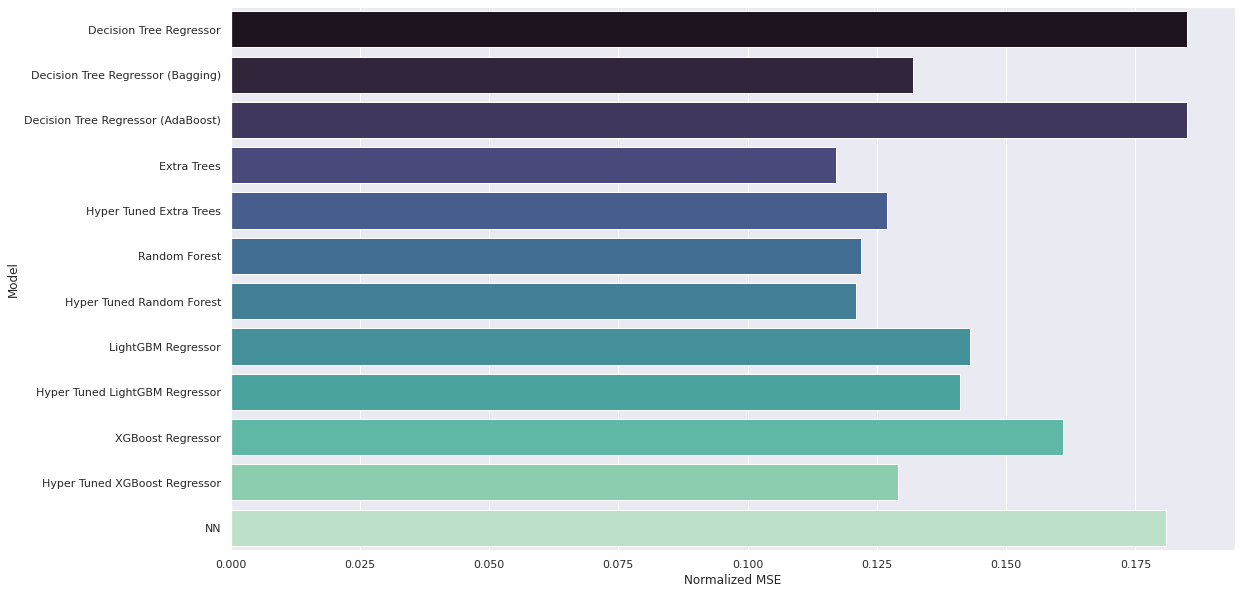

In [ ]:
ax = sns.barplot(data = metrics, y = metrics.index,x = 'Normalized MSE',palette = 'mako')

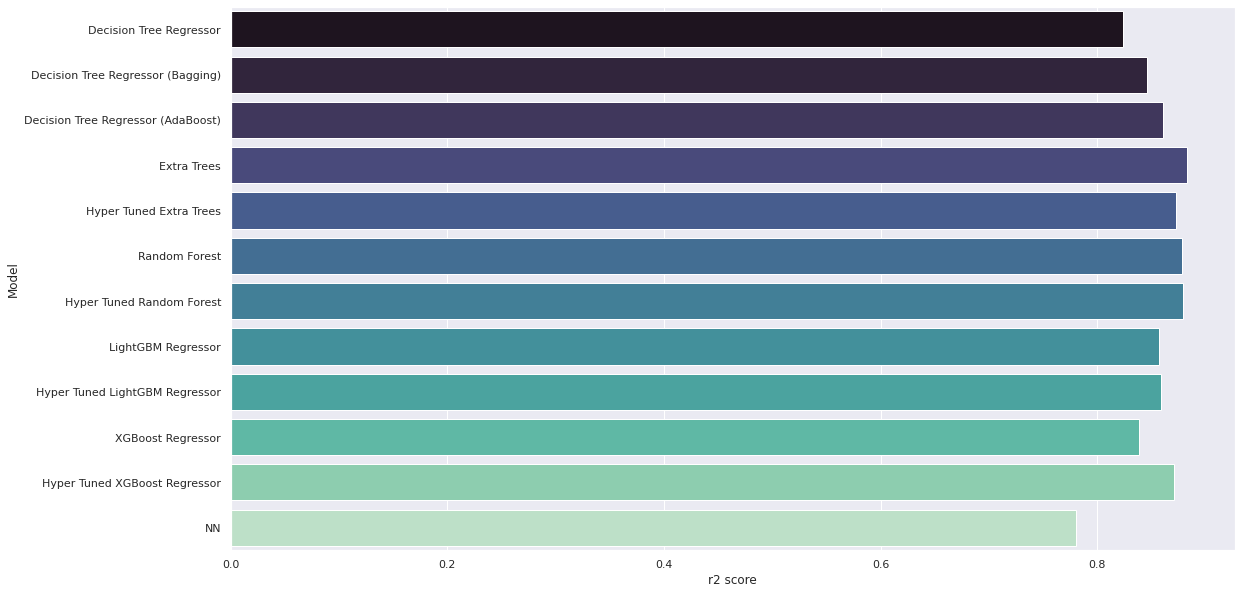

In [ ]:
ax = sns.barplot(data = metrics, y = metrics.index,x = 'r2 score',palette = 'mako')